In [0]:
import time
from decompiled import DUT
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import sys
%matplotlib inline

In [2]:
seed = 12345
my_dut = DUT(seed,True,3)

meastime, nmeas, nport, meas, ports, expyield = my_dut.info()
print("DUT: meas. time= ", meastime, " | measurements= ", nmeas, " | ports= ", nport, " | expected yield = ", expyield)

error_count = 0
X = []
Y = []
t=0
df_measure = pd.DataFrame()
data= {}
data['component']=[]

DUT: meas. time=  99.83372299999998  | measurements=  44  | ports=  8  | expected yield =  3


In [3]:
for x in range(10000):
    my_dut.new_dut()

    if x % 500 == 0:
        my_dut.calibrate()

    for i in range(0, nmeas):
        t, result, dist = my_dut.gen_meas_idx(i)
        
        df_measure.loc[x, i] = dist
        # dut['measurements'].append(measurement)

    t, res, dist = my_dut.get_result()
    # dut['dut_result'] = res
    # data['component'].append(dut)
    df_measure.loc[x, 'Result'] = 0
    if dist > 1:
        df_measure.loc[x, 'Result'] = 1
    X.append(t)
    Y.append(dist)
    if not res:
        error_count += 1

error_dut, error_meas = my_dut.get_errordutcount()
print("Total: ", t, "s ", x + 1, " ( ", error_count, " | ", error_dut, " | ", error_meas, " ) ==> ",
        (x + 1 - error_count) / (x + 1))

Calibration at  0.1  took  339.07016  seconds.
Calibration at  50306.03165999865  took  339.07016  seconds.
Calibration at  100611.96332001129  took  339.07016  seconds.
Calibration at  150917.89498002178  took  339.07016  seconds.
Calibration at  201223.8266400191  took  339.07016  seconds.
Calibration at  251529.75830001643  took  339.07016  seconds.
Calibration at  301835.6899599907  took  339.07016  seconds.
Calibration at  352141.6216199589  took  339.07016  seconds.
Calibration at  402447.5532799271  took  339.07016  seconds.
Calibration at  452753.48493989534  took  339.07016  seconds.
Calibration at  503059.41659986356  took  339.07016  seconds.
Calibration at  553365.3482598488  took  339.07016  seconds.
Calibration at  603671.2799198461  took  339.07016  seconds.
Calibration at  653977.2115798434  took  339.07016  seconds.
Calibration at  704283.1432398407  took  339.07016  seconds.
Calibration at  754589.0748998381  took  339.07016  seconds.
Calibration at  804895.0065598354

In [4]:
df_measure.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,Result
0,0.010997,0.134209,0.199594,0.010634,0.000271,0.244423,0.023481,0.078095,0.165657,0.348332,0.027898,0.024181,0.248904,0.181918,0.356777,0.035404,0.190462,0.450154,0.054936,0.018759,0.017302,0.085236,0.083441,0.053077,0.102410,0.331587,0.012181,0.140433,0.199382,0.020323,0.098594,0.065265,0.239584,-0.003554,0.021006,0.003550,0.012316,0.024408,0.014467,0.008689,0.004907,0.010384,0.008516,0.009890,0.0
1,-0.001820,0.064378,0.188391,0.154082,0.159932,0.080586,0.007658,0.025107,0.586053,0.000313,0.049689,0.743053,0.089208,0.053669,0.177651,0.035880,0.009572,0.009339,-0.001854,0.003502,0.002120,0.130268,0.017880,0.009838,0.066798,0.083628,0.001898,0.119620,0.997282,0.034802,0.003676,0.015701,0.011389,0.003784,0.000434,0.007410,0.005922,0.004504,0.001069,0.007007,0.000811,0.010300,0.006061,-0.001484,0.0
2,0.008446,0.006021,0.040776,0.003467,0.209817,0.016994,0.003574,0.092617,0.233313,0.012343,0.001951,0.135952,0.073189,0.215316,0.062872,-0.000458,0.173820,0.740830,0.244974,0.233919,0.145443,0.008464,-0.001927,0.351360,0.087866,0.424756,0.002669,0.003571,0.003619,0.262383,-0.008018,0.031030,0.003774,-0.008031,-0.009365,-0.000702,0.019813,0.001447,0.012949,-0.000241,0.026163,-0.003125,0.009029,0.003469,0.0
3,0.150977,0.403874,0.035704,0.021427,0.034875,0.007757,0.025273,0.004150,0.437532,0.233374,0.086327,0.019974,0.078031,0.003410,0.180801,0.026405,0.026558,0.018131,0.132363,0.034269,0.004845,0.032747,0.018531,-0.002932,0.015755,1.163422,0.171360,0.167914,0.033673,0.014213,0.024976,0.017106,-0.007938,0.004070,0.010755,0.012679,-0.009512,-0.015964,0.002118,0.000438,-0.001195,-0.005477,-0.006345,0.008967,1.0
4,-0.005996,-0.006704,0.070091,0.021209,-0.010853,-0.009889,0.267812,0.204441,0.466316,0.059602,0.079508,0.122576,0.416103,0.071145,0.042136,0.350773,0.008103,0.028422,0.078730,0.012062,0.028513,0.001859,0.012420,0.001283,0.021665,0.037964,0.066107,-0.018403,0.005983,-0.011497,-0.014960,0.101242,0.178127,-0.007342,-0.010648,-0.012337,-0.007546,-0.001714,-0.000376,-0.014060,0.002427,-0.002680,-0.006166,-0.005229,0.0


In [35]:
df_measure.corr().to_json(orient='values')

'[[1.0,0.0234433644,0.0263394433,0.0153567634,0.0279998656,0.027756355,0.0061193424,0.026061005,0.0198211835,0.0248533493,0.0219845386,0.0071059012,0.0226232166,0.0085714578,0.023730366,0.0201172748,0.0336293627,0.0141264457,0.0274107962,0.0218733117,0.023196783,0.0220158548,0.0256831142,0.018952491,0.0178700434,0.046114455,0.0587466975,0.0517705191,0.0144807152,0.0141238071,0.0282582974,0.0353711335,0.002814194,0.1106577819,0.1090059887,0.103557212,0.0973207887,0.0838108876,0.1072048238,0.1049286095,0.1155837613,0.0920043209,0.1103705834,0.1241693488,0.098202618],[0.0234433644,1.0,0.020937041,0.029540367,0.02815786,0.0085886867,0.0237196958,0.0242135294,0.0251192905,0.0010082492,0.0104216246,0.0044121709,0.0021448305,0.0204219039,0.0112727699,0.0051032691,0.0277634121,0.0162966037,0.0212001076,0.0104715233,0.0202715914,0.0268289347,0.0135367831,0.0162542436,0.017924852,0.0250251662,0.006990417,0.0265416391,0.0146364808,0.041624139,0.0006431835,0.0148985718,0.012416316,0.0984749336,0.0

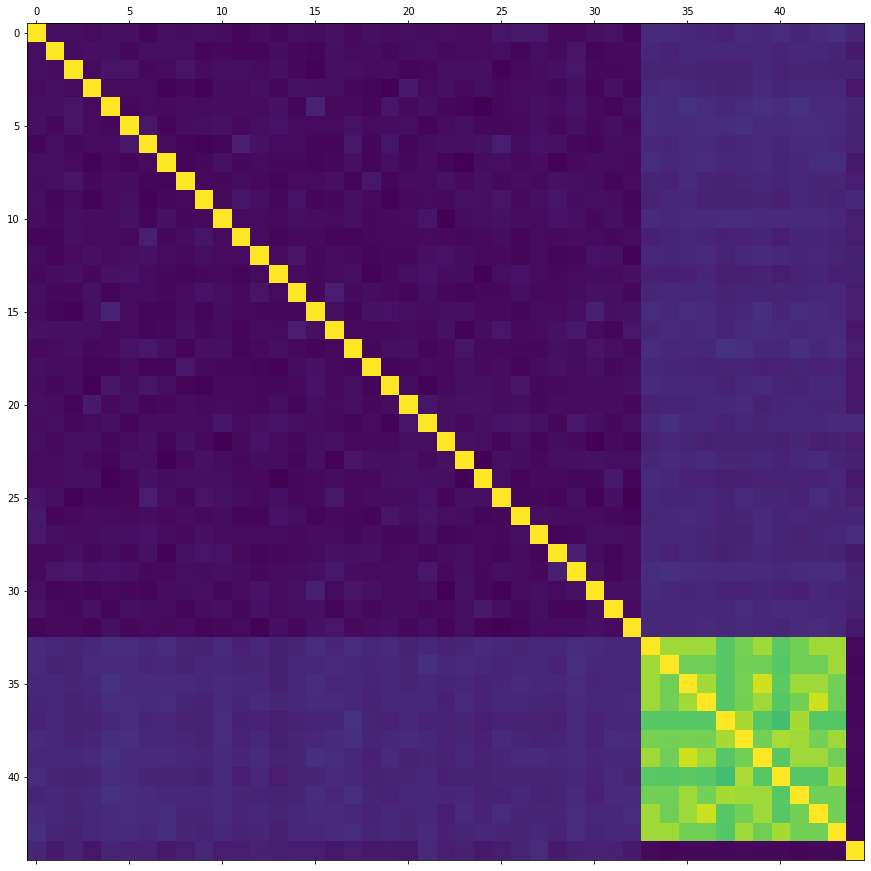

In [5]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_measure.corr(), fignum=f.number)

In [0]:
df_pos = df_measure[df_measure.Result == 1].reset_index(drop=True)

In [0]:
df_neg = df_measure[df_measure.Result == 0]

In [26]:
df_neg.shape

(9139, 45)

In [0]:
df_new = pd.concat([df_pos, df_neg[0:1500]],axis=0, ignore_index=True)

In [0]:
df_new = df_new.sample(frac=1)

In [0]:
# df_measure.DUT_result[np.array(Y)>=1.0] = 1

In [0]:
# df_measure.head(15)

In [0]:
df_measure.to_csv('df_measure_seed12345_3_23good.csv')

In [0]:
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
from xgboost import XGBClassifier, DMatrix
import xgboost as xgb
#import shap

In [0]:
y1 = df_new['Result']
df = df_new.drop(['Result'], axis=1)
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(df, y1, test_size=0.2)

In [30]:
xgbc1 = XGBClassifier()
xgbc1.fit(X1_train, y1_train)
pred1 = xgbc1.predict(X1_test)
y1_test_prob = xgbc1.predict_proba(X1_test)
score1 = [accuracy_score(y1_test, pred1), roc_auc_score(y1_test, y1_test_prob[:,1])]
report1 = classification_report(pred1, y1_test)

print(score1, '\n', report1)

[0.9344608879492601, 0.984421965317919] 
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       313
         1.0       0.87      0.94      0.91       160

    accuracy                           0.93       473
   macro avg       0.92      0.94      0.93       473
weighted avg       0.94      0.93      0.94       473



In [31]:
importances1 = xgbc1.feature_importances_
print(importances1)
list5 = np.argsort(importances1)
featsxg = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, xgbc1.feature_importances_):
    featsxg[feature] = importance #add the name/value pair 

importances1 = pd.DataFrame.from_dict(featsxg, orient='index').rename(columns={0: 'XGB Feature importance'})
#importances1.sort_values(by='XGB Feature importance').plot(kind='bar', rot=45, figsize = (25,10))

[0.03490149 0.02759314 0.02570184 0.02939538 0.03581024 0.03126808
 0.02683047 0.02889268 0.03251513 0.03692957 0.03200767 0.02614533
 0.03058282 0.03031753 0.02953725 0.02932025 0.02258583 0.01965342
 0.0284113  0.02723085 0.02727608 0.03081149 0.03187605 0.02980743
 0.0274598  0.03060018 0.03317269 0.0329756  0.03198021 0.03435823
 0.03730825 0.03588429 0.0308595  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


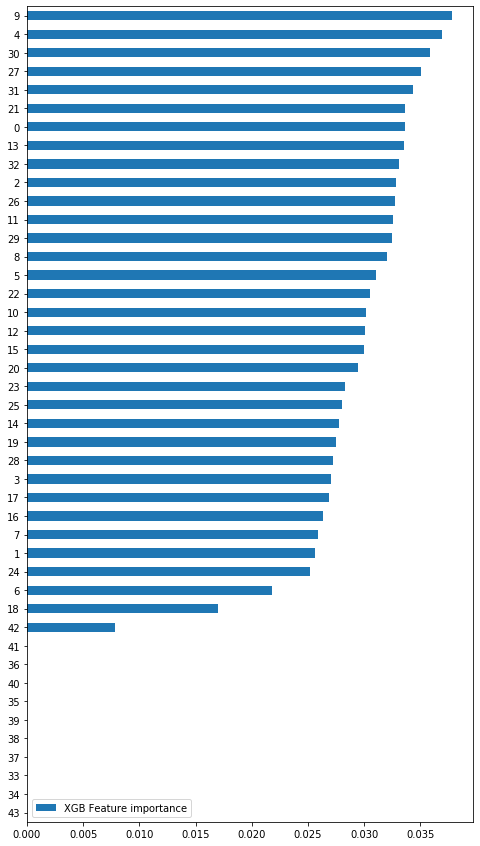

In [16]:
importances1.sort_values(by='XGB Feature importance').plot(kind='barh', figsize = (8,15))

In [21]:
# Printing AUC
fpr_rf, tpr_rf, _ = roc_curve(y1_test, y1_test_prob[:,1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf

0.9853745791245792

In [0]:
new_list = importances1.sort_values(by='XGB Feature importance', ascending=False)[0:33].index

In [18]:
new_list

Int64Index([ 9,  4, 30, 27, 31, 21,  0, 13, 32,  2, 26, 11, 29,  8,  5, 22, 10,
            12, 15, 20, 23, 25, 14, 19, 28,  3, 17, 16,  7,  1, 24,  6, 18],
           dtype='int64')

In [0]:
y1 = df_new['Result']
df = df_new.drop(['Result'], axis=1)
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(df[new_list], y1, test_size=0.2)

In [20]:
xgbc2 = XGBClassifier()
xgbc2.fit(X1_train, y1_train)
pred1 = xgbc2.predict(X1_test)
y1_test_prob = xgbc2.predict_proba(X1_test)
score1 = [accuracy_score(y1_test, pred1), roc_auc_score(y1_test, y1_test_prob[:,1])]
report1 = classification_report(pred1, y1_test)

print(score1, '\n', report1)

[0.9830866807610994, 0.9853745791245792] 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       297
         1.0       0.98      0.98      0.98       176

    accuracy                           0.98       473
   macro avg       0.98      0.98      0.98       473
weighted avg       0.98      0.98      0.98       473



In [0]:
cm = confusion_matrix(y1_test.values, pred1)

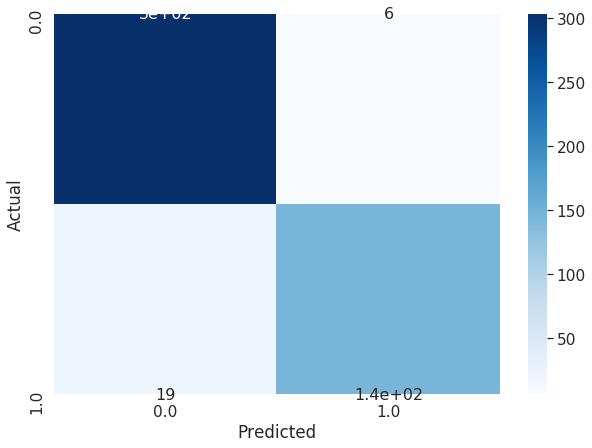

In [0]:
df_cm = pd.DataFrame(cm, columns=np.unique(y1_test), index = np.unique(pred1))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm.to_csv('test.csv')
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [22]:
!pip install shap

     |████████████████████████████████| 266kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376813 sha256=48d087f3b974545b6f5ec4818fb9c90acd409ff8b798e963371499b96873a0c4
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [0]:
import shap
dt = xgb.DMatrix(X1_train, label=y1_train.values)
dv = xgb.DMatrix(X1_test, label=y1_test.values)
explainer = shap.TreeExplainer(xgbc1)
shap_values = explainer.shap_values(X1_test)

In [0]:
# X1_test

/usr/local/lib/python3.6/dist-packages/shap/plots/summary.py:56: UserWarning: auto_size_plot=False is depricated and is now ignored! Use plot_size=None instead.
  warnings.warn("auto_size_plot=False is depricated and is now ignored! Use plot_size=None instead.")


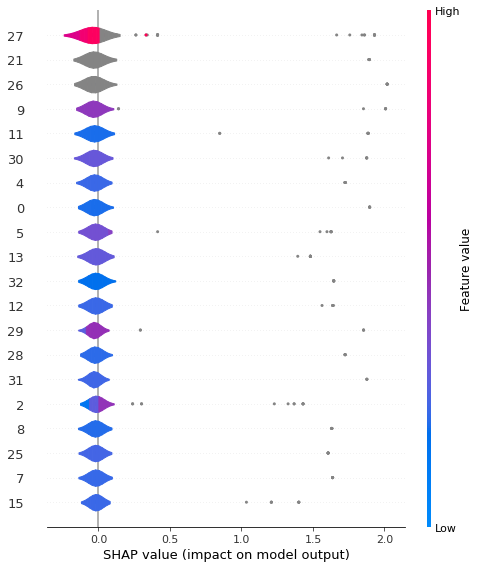

In [49]:
shap.summary_plot(shap_values, X1_test, plot_type='violin', auto_size_plot=True)

In [41]:
shap.force_plot(explainer.expected_value, shap_values, X1_test)